# H1B dataset

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
h1b=pd.read_csv("H1B.csv")

### Overview of the data

In [23]:
h1b.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [24]:
h1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


### Data Cleansing

In [25]:
h1b.isnull().sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [26]:
h1b=h1b.dropna()

In [27]:
h1b.isnull().sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

### Analysis of the Dataset

In [28]:
# Petition distributed by case statuses
print(h1b['CASE_STATUS'].value_counts())

CERTIFIED                                             2512114
CERTIFIED-WITHDRAWN                                    195721
DENIED                                                  85161
WITHDRAWN                                               84752
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    1
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64


In [29]:
# Top employers filing the petitions
h1b['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                      130257
TATA CONSULTANCY SERVICES LIMITED     64273
WIPRO LIMITED                         45673
DELOITTE CONSULTING LLP               35999
IBM INDIA PRIVATE LIMITED             33585
                                      ...  
YOUNG ENTERPRISE SYSTEMS, INC.,           1
RONALD D. MIZRAHI DDS PC                  1
SUPPLY PRO INC                            1
MEDIQUIRE, INC.                           1
J. LOGAN INTERIORS                        1
Name: EMPLOYER_NAME, Length: 214982, dtype: int64

In [30]:
# Top 15 companies that filed the most visa application
h1b['EMPLOYER_NAME'].value_counts()[0:15]

INFOSYS LIMITED                                    130257
TATA CONSULTANCY SERVICES LIMITED                   64273
WIPRO LIMITED                                       45673
DELOITTE CONSULTING LLP                             35999
IBM INDIA PRIVATE LIMITED                           33585
ACCENTURE LLP                                       33226
MICROSOFT CORPORATION                               25551
HCL AMERICA, INC.                                   22488
ERNST & YOUNG U.S. LLP                              18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17322
CAPGEMINI AMERICA INC                               16628
GOOGLE INC.                                         16425
LARSEN & TOUBRO INFOTECH LIMITED                    14318
IGATE TECHNOLOGIES INC.                             12327
IBM CORPORATION                                     11976
Name: EMPLOYER_NAME, dtype: int64

In [31]:
# Top employers granting maximum prevailing wages
print(h1b.sort_values(by="PREVAILING_WAGE",ascending=False)[['EMPLOYER_NAME','PREVAILING_WAGE']][0:5].reset_index())

     index                        EMPLOYER_NAME  PREVAILING_WAGE
0  2163248  GUARDIAN HEALTHCARE PROVIDERS, INC.     6.997607e+09
1  2797982                     SCIVANTAGE, INC.     1.007814e+09
2  1673867               DISCOVER PRODUCTS INC.     8.201323e+08
3  1819718                        IDEXCEL, INC.     7.099999e+08
4  1547574                           ARKRIT LLC     6.169317e+08


In [32]:
# Top 20 states filing highest visa petitions
h1b['WORKSITE'].str.split(',').str[1].value_counts()[0:20]

 CALIFORNIA        548539
 TEXAS             286704
 NEW YORK          282429
 NEW JERSEY        206876
 ILLINOIS          154843
 MASSACHUSETTS     112659
 PENNSYLVANIA      103729
 WASHINGTON        100754
 FLORIDA           100384
 GEORGIA            99679
 VIRGINIA           86948
 MICHIGAN           77868
 NORTH CAROLINA     75701
 OHIO               71765
 MARYLAND           53145
 CONNECTICUT        48174
 MINNESOTA          45864
 ARIZONA            40184
 MISSOURI           32737
 WISCONSIN          30485
Name: WORKSITE, dtype: int64

In [33]:
# Petition distribution by year
h1b['YEAR'].value_counts()

2016.0    629299
2015.0    600120
2014.0    498027
2013.0    422427
2012.0    394267
2011.0    333625
Name: YEAR, dtype: int64

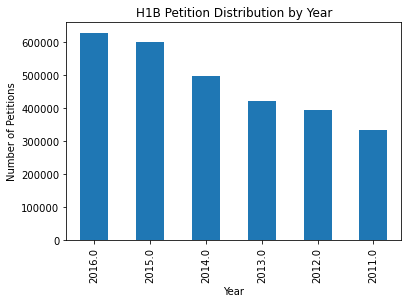

In [34]:
h1b['YEAR'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Petitions')
plt.title('H1B Petition Distribution by Year')
plt.show()

In [35]:
# Number of visa petitions denied
h1b['CASE_STATUS'].value_counts().loc['DENIED']

85161

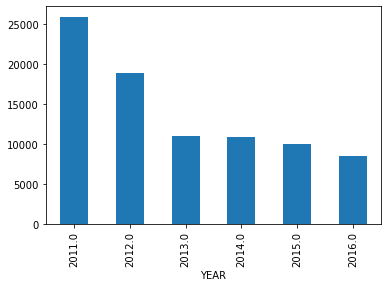

In [36]:
# Rate of visas denied from last 5 years
h=h1b[h1b['CASE_STATUS'] == 'DENIED'].groupby('YEAR').size()
h.plot(x='YEAR',y=h,kind='bar')
plt.show()

In [37]:
# Number of visa petitions filed by states
h1b['WORKSITE'].str.split(',').str[1].value_counts()

 CALIFORNIA              548539
 TEXAS                   286704
 NEW YORK                282429
 NEW JERSEY              206876
 ILLINOIS                154843
 MASSACHUSETTS           112659
 PENNSYLVANIA            103729
 WASHINGTON              100754
 FLORIDA                 100384
 GEORGIA                  99679
 VIRGINIA                 86948
 MICHIGAN                 77868
 NORTH CAROLINA           75701
 OHIO                     71765
 MARYLAND                 53145
 CONNECTICUT              48174
 MINNESOTA                45864
 ARIZONA                  40184
 MISSOURI                 32737
 WISCONSIN                30485
 COLORADO                 30231
 INDIANA                  28230
 TENNESSEE                25906
 OREGON                   22759
 DISTRICT OF COLUMBIA     22408
 DELAWARE                 17705
 IOWA                     15143
 ARKANSAS                 13775
 KANSAS                   12331
 UTAH                     12162
 RHODE ISLAND             11316
 SOUTH C

In [38]:
# Rate of denial of visa petition by the states
h=h1b['CASE_STATUS']=='DENIED'
h.groupby(h1b['WORKSITE'].str.split(',').str[1]).size()

WORKSITE
 ALABAMA                   8644
 ALASKA                    1116
 ARIZONA                  40184
 ARKANSAS                 13775
 CALIFORNIA              548539
 COLORADO                 30231
 CONNECTICUT              48174
 DELAWARE                 17705
 DISTRICT OF COLUMBIA     22408
 FLORIDA                 100384
 GEORGIA                  99679
 HAWAII                    3157
 IDAHO                     3777
 ILLINOIS                154843
 INDIANA                  28230
 IOWA                     15143
 KANSAS                   12331
 KENTUCKY                 10968
 LOUISIANA                10043
 MAINE                     3132
 MARYLAND                 53145
 MASSACHUSETTS           112659
 MICHIGAN                 77868
 MINNESOTA                45864
 MISSISSIPPI               2686
 MISSOURI                 32737
 MONTANA                    644
 NA                        3069
 NEBRASKA                  8600
 NEVADA                    7004
 NEW HAMPSHIRE             9069

In [39]:
# Top 25 job titles
h1b['JOB_TITLE'].value_counts()[0:25]

PROGRAMMER ANALYST             243357
SOFTWARE ENGINEER              118897
COMPUTER PROGRAMMER             68696
SYSTEMS ANALYST                 60754
SOFTWARE DEVELOPER              41875
BUSINESS ANALYST                38781
COMPUTER SYSTEMS ANALYST        34036
TECHNOLOGY LEAD - US            28307
SENIOR SOFTWARE ENGINEER        26617
TECHNOLOGY ANALYST - US         26010
ASSISTANT PROFESSOR             24436
SENIOR CONSULTANT               24120
CONSULTANT                      22643
PROJECT MANAGER                 19015
DATABASE ADMINISTRATOR          16108
PHYSICAL THERAPIST              14203
RESEARCH ASSOCIATE              13409
COMPUTER PROGRAMMER ANALYST     13116
ACCOUNTANT                      12934
DEVELOPER                       12737
ASSOCIATE                       12447
ANALYST                         11644
LEAD ENGINEER                   11012
SENIOR SOFTWARE DEVELOPER       10031
SYSTEMS ENGINEER - US           10020
Name: JOB_TITLE, dtype: int64

In [40]:
# Top 10 occupations with the highest wages
h1b.sort_values('PREVAILING_WAGE',ascending=False)[['JOB_TITLE','PREVAILING_WAGE']][0:10].reset_index()

,index,JOB_TITLE,PREVAILING_WAGE
0,2163248,PHYSICAL THERAPISTS,6.997607e+09
1,2797982,SOFTWARE DEVELOPER,1.007814e+09
2,1673867,PROJECT MANAGER,8.201323e+08
3,1819718,.NET DEVELOPER,7.099999e+08
4,1547574,PROGRAMMER/ANALYST,6.169317e+08
5,1668384,RESEARCH ASSOCIATE,4.134726e+08
6,1805875,"MANAGER, SOFTWARE ENGINEERING",4.103154e+08
7,2796071,"MANAGING DIRECTOR, EQUITY DERIVATIVES",4.066379e+08
8,2586866,CHIEF INVESTMENT OFFICER,3.783437e+08
9,1780069,"CHIEF FINANCIAL OFFICER, HUNTSWORTH HEALTH GLOBAL",3.610381e+08


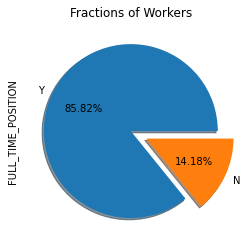

In [45]:
# To analyse the fraction of full-time and part-time workers
h1b['FULL_TIME_POSITION'].value_counts().plot(kind="pie",explode=[0, 0.2],autopct="%.2f%%",shadow=True)
plt.title("Fractions of Workers")
plt.show()